In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_a2cd37142f6a4f1385640e6d0f7d33ae = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_a2cd37142f6a4f1385640e6d0f7d33ae = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_a2cd37142f6a4f1385640e6d0f7d33ae = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='AOkCYAcY96i7k9Kxhyr1SM0ylfrxlBmgI2MRQgICFgem',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_a2cd37142f6a4f1385640e6d0f7d33ae)

body = client_a2cd37142f6a4f1385640e6d0f7d33ae.get_object(Bucket='testproject-donotdelete-pr-a7cyywjqdb9klp',Key='customers_orders.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,CUSTNAME,GenderCode,CITY,CREDITCARD_TYPE,CUST_ID,ORDER_ID,ORDER_DATE,ORDER_TIME,AGE,T_TYPE,...,portfolio_20,portfolio_21,portfolio_22,portfolio_23,portfolio_24,portfolio_25,portfolio_26,portfolio_27,portfolio_28,portfolio_29
0,Allen Perl,Mr.,Abeto,Master Card,10003,1106,2016-06-23 00:00:00.000,2016.6.23 15:29,27,Complete,...,0,1,0,0,0,0,0,0,0,0
1,Allen Perl,Mr.,Abeto,Master Card,10003,2948,2016-01-08 00:00:00.000,2016.1.8 3:13,27,Abandoned,...,1,0,0,0,0,0,0,0,0,0
2,Allen Perl,Mr.,Abeto,Master Card,10003,3323,2016-08-25 00:00:00.000,2016.8.25 16:39,27,Complete,...,0,0,0,0,0,0,0,0,0,0
3,Allen Perl,Mr.,Abeto,Master Card,10003,7498,2016-10-22 00:00:00.000,2016.10.22 8:19,27,Complete,...,0,0,0,0,0,0,0,0,0,0
4,Allen Perl,Mr.,Abeto,Master Card,10003,7973,2016-04-06 00:00:00.000,2016.4.6 13:07,27,Complete,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# read column names, 콜룸명 읽어보기
# df.info()
print(df.columns.values.tolist())
# df.columns.values.tolist()

['CUSTNAME', 'GenderCode', 'CITY', 'CREDITCARD_TYPE', 'CUST_ID', 'ORDER_ID', 'ORDER_DATE', 'ORDER_TIME', 'AGE', 'T_TYPE', 'PURCHASE_TOUCHPOINT', 'PURCHASE_STATUS', 'GENERATION', 'portfolio_1', 'portfolio_2', 'portfolio_3', 'portfolio_4', 'portfolio_5', 'portfolio_6', 'portfolio_7', 'portfolio_8', 'portfolio_9', 'portfolio_10', 'portfolio_11', 'portfolio_12', 'portfolio_13', 'portfolio_14', 'portfolio_15', 'portfolio_16', 'portfolio_17', 'portfolio_18', 'portfolio_19', 'portfolio_20', 'portfolio_21', 'portfolio_22', 'portfolio_23', 'portfolio_24', 'portfolio_25', 'portfolio_26', 'portfolio_27', 'portfolio_28', 'portfolio_29']


In [4]:
#delete unnecessary columns, 불필요한 콜룸 지우기
df.drop(['CUSTNAME',
 'GenderCode',
 'CITY',
 'CREDITCARD_TYPE',
 'ORDER_ID',
 'ORDER_DATE',
 'ORDER_TIME',
 'AGE',
 'T_TYPE',
 'PURCHASE_TOUCHPOINT',
 'PURCHASE_STATUS',
 'GENERATION',], axis=1,inplace=True)

print(df.shape)
display(df)

(13733, 30)


,CUST_ID,portfolio_1,portfolio_2,portfolio_3,portfolio_4,portfolio_5,portfolio_6,portfolio_7,portfolio_8,portfolio_9,...,portfolio_20,portfolio_21,portfolio_22,portfolio_23,portfolio_24,portfolio_25,portfolio_26,portfolio_27,portfolio_28,portfolio_29
0,10003,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,10003,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,10003,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,10003,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13728,15597,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
13729,15597,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
13730,15597,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
13731,15598,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [5]:
#sum up each customer's purchases, 구매자별 사용 제품 리스트 합산
df = df.groupby(by=['CUST_ID'], as_index=False).sum()

In [6]:
#delet customer id column, 고객 아이디 콜룸 삭제
df.drop(['CUST_ID'], axis=1,inplace=True)

In [7]:
#review after deletion
print(df.shape)
display(df)

(4713, 29)


,portfolio_1,portfolio_2,portfolio_3,portfolio_4,portfolio_5,portfolio_6,portfolio_7,portfolio_8,portfolio_9,portfolio_10,...,portfolio_20,portfolio_21,portfolio_22,portfolio_23,portfolio_24,portfolio_25,portfolio_26,portfolio_27,portfolio_28,portfolio_29
0,0,0,1,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,2,...,0,0,2,0,0,0,3,0,2,1
2,0,1,2,2,1,0,0,1,1,0,...,2,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,2,0,1,3,...,1,0,2,0,2,0,2,0,2,3
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4708,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0
4709,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4710,0,1,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
4711,0,0,1,0,0,1,0,1,0,2,...,1,2,2,0,1,1,3,1,1,1


<AxesSubplot:>

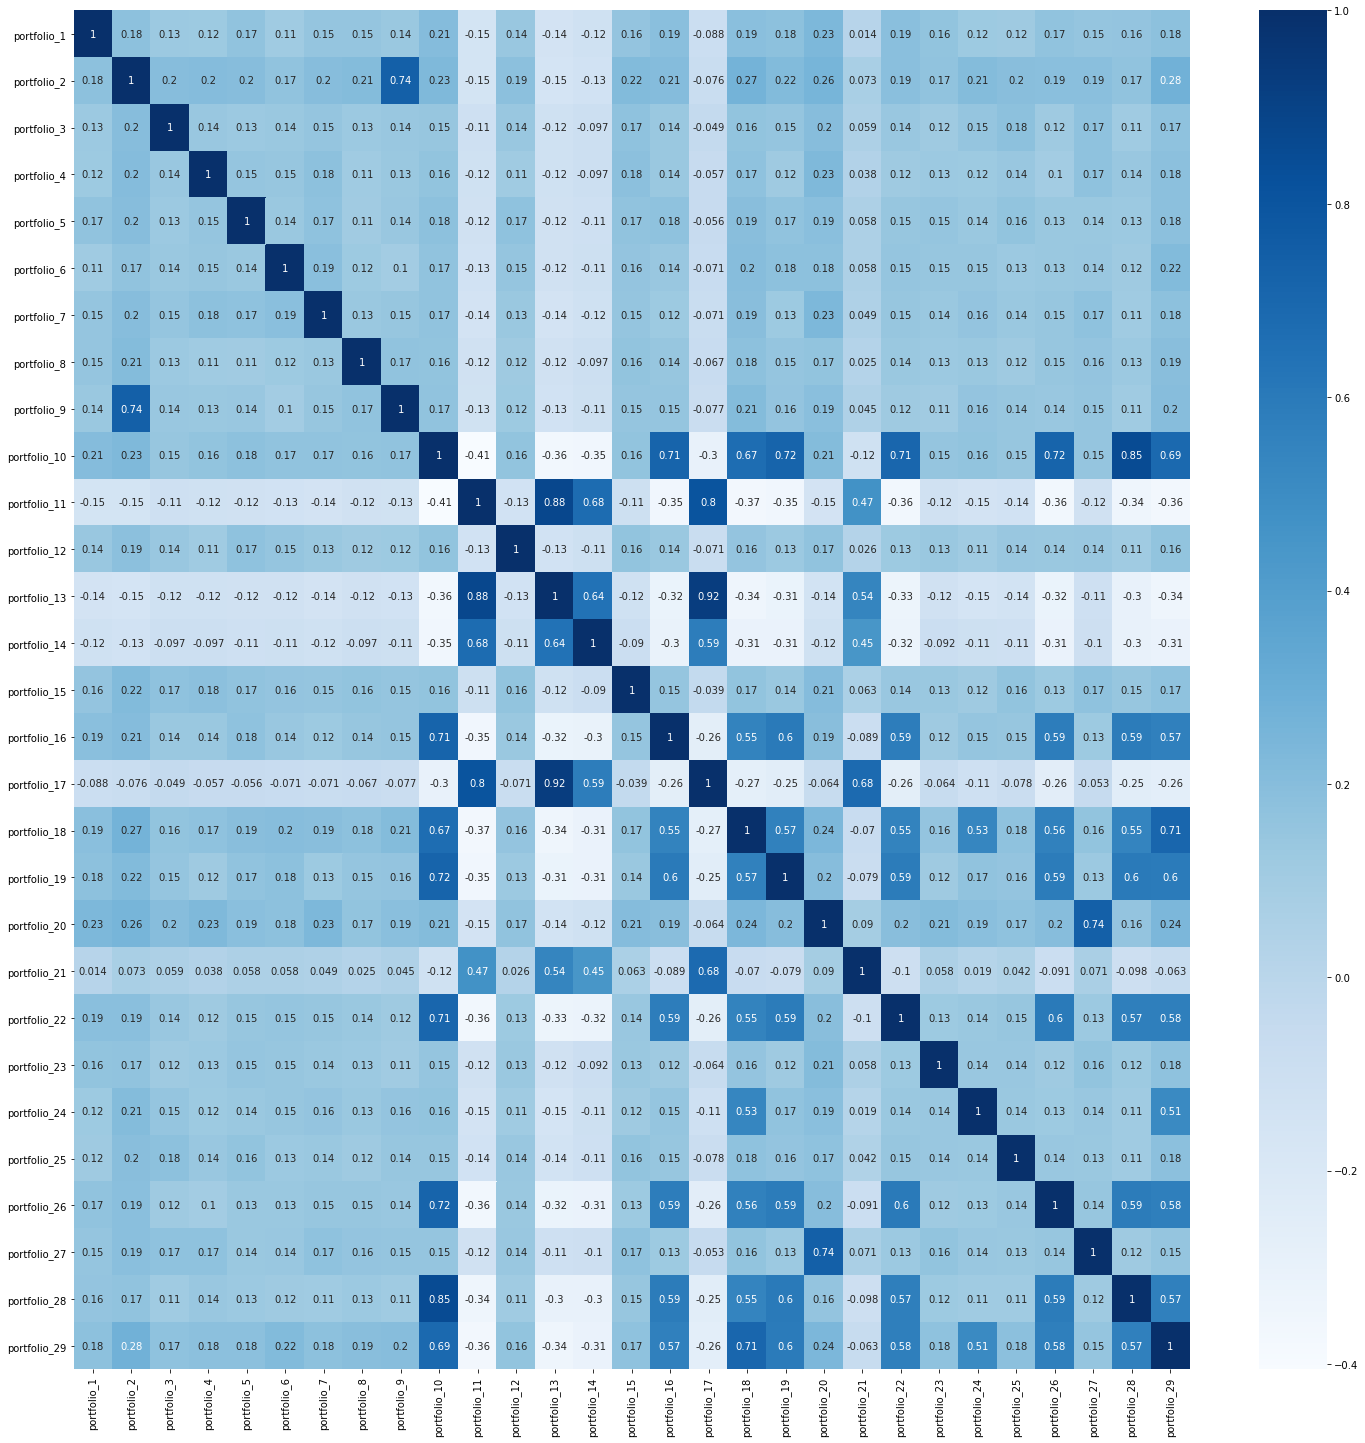

In [8]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [9]:
X = df[df.columns.values.tolist()].values.astype('int32')

In [10]:
# number of clusters 15(choose cluster number as number of products / 2)
# 클러스터 15개 선택(상품 갯수 / 2로 클러스터 정함)
num_clusters = 15
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

KMeans(n_clusters=15)

In [11]:
# predict cluster for each dataset. Used for precomputing often used product
# 사용자별 클러스터 추측, 추후 클러스터별 많이 사용된 제품 추천에 이용
y_kmeans = kmeans.predict(X)
y_kmeans

array([ 3, 13, 11, ...,  4,  2,  1], dtype=int32)

In [12]:
# Make result as dataframe. (Used for review and precomputing often used products)
# 사용자별 클러스터 추측 결과 dataframe으로 변경, 추후 클러스터별 많이 사용된 제품 추천에 이용
df_y = pd.DataFrame(y_kmeans, columns = {"cluster"})
df_y

,cluster
0,3
1,13
2,11
3,9
4,12
...,...
4708,12
4709,10
4710,4
4711,2


<AxesSubplot:xlabel='cluster', ylabel='Count'>

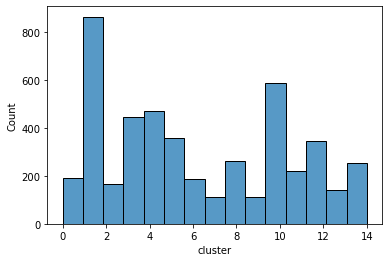

In [13]:
# Review cluster, check distribution of users for each clusters(expect about distributed count)
# 클러스터별 사용자 맵핑된 갯수 확인(골고루 분포면 좋음)
sns.histplot(df_y.cluster,bins=15)

In [14]:
# Add cluster result to data frame. Used for precomputing often used products
# 사용자별 클러스터 추측 결과 dataframe에 추가, 추후 클러스터별 많이 사용된 제품 추천에 이용
df["cluster"] = df_y["cluster"]

<AxesSubplot:>

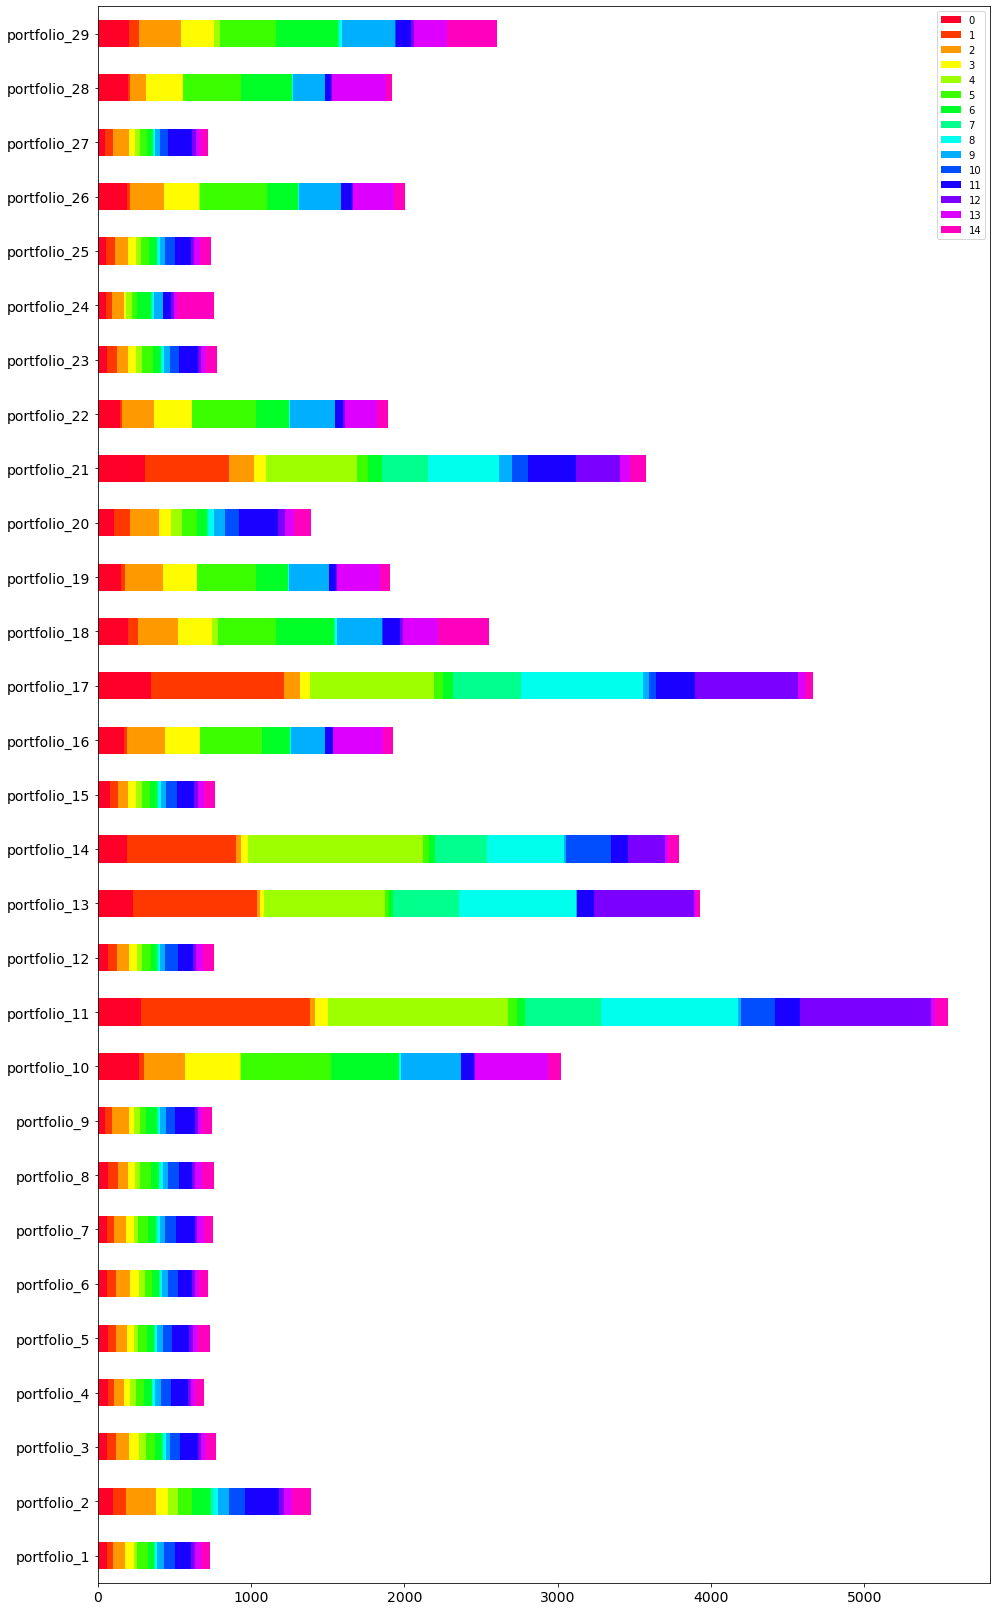

In [15]:
# review cluster - 2
# 상품별 
grouped_df = df.groupby(["cluster"], as_index=False).sum()
grouped_df.drop(['cluster'], axis=1,inplace=True)
df_a = grouped_df.T
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,29], colormap='gist_rainbow')

In [16]:
#get most found item per each cluster
for x in range(grouped_df.shape[0]):
    df_a['rank_'+str(x)] = df_a[x].rank(method='first', ascending=False)

In [17]:
def get_rank_from_cluster(a):
    result = []
    for x in range(1, 6):
        result.append(df_a[df_a['rank_'+str(a)] == x].index[0])
    return result

for x in range(15):
    answer = get_rank_from_cluster(x)
    print(answer)

['portfolio_17', 'portfolio_21', 'portfolio_11', 'portfolio_10', 'portfolio_13']
['portfolio_11', 'portfolio_17', 'portfolio_13', 'portfolio_14', 'portfolio_21']
['portfolio_29', 'portfolio_10', 'portfolio_18', 'portfolio_16', 'portfolio_19']
['portfolio_10', 'portfolio_22', 'portfolio_28', 'portfolio_16', 'portfolio_26']
['portfolio_11', 'portfolio_14', 'portfolio_17', 'portfolio_13', 'portfolio_21']
['portfolio_10', 'portfolio_26', 'portfolio_22', 'portfolio_16', 'portfolio_19']
['portfolio_10', 'portfolio_29', 'portfolio_18', 'portfolio_28', 'portfolio_22']
['portfolio_11', 'portfolio_17', 'portfolio_13', 'portfolio_14', 'portfolio_21']
['portfolio_11', 'portfolio_17', 'portfolio_13', 'portfolio_14', 'portfolio_21']
['portfolio_10', 'portfolio_29', 'portfolio_18', 'portfolio_22', 'portfolio_26']
['portfolio_14', 'portfolio_11', 'portfolio_21', 'portfolio_2', 'portfolio_20']
['portfolio_21', 'portfolio_17', 'portfolio_20', 'portfolio_2', 'portfolio_11']
['portfolio_11', 'portfolio_17